In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
os.chdir("".join((os.getcwd().split("PCNN")[0], "/PCNN/src/")))

import utils
import core.build.pclib as pclib
from game.envs import *
from game.constants import ROOMS, GAME_SCALE
import simulations as sim

#import pcnn_core as pcr
from IPython.display import clear_output
from tqdm import tqdm
import time, json, os

%load_ext autoreload
%autoreload 2

logger = utils.setup_logger("M", level=1)
logger()

2025-02-14 20:32:44 | 
2025-02-14 20:32:44 | 
2025-02-14 20:32:44 | 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## study remapping

**General parameters**

In [43]:
1.*0.015, 0.05 * 0.015, 1.*0.006, 0.05*0.006, 0.01*0.015

(0.015, 0.00075, 0.006, 0.00030000000000000003, 0.00015)

In [8]:
reward_settings = {
    "rw_fetching": "probabilistic",
    "rw_value": "discrete",
    "rw_position": np.array([0.5, 0.3]) * GAME_SCALE,
    "rw_radius": 0.1 * GAME_SCALE,
    "rw_sigma": 1.5 * GAME_SCALE,
    "rw_bounds": np.array([0.23, 0.77,
                           0.23, 0.77]) * GAME_SCALE,
    "delay": 150,
    "silent_duration": 5_000,
    "fetching_duration": 1,
    "transparent": False,
    "beta": 30.,
    "alpha": 0.06,
}

agent_settings = {
    # "speed": 0.7,
    "init_position": np.array([0.2, 0.2]) * GAME_SCALE,
    "agent_bounds": np.array([0.23, 0.77,
                              0.23, 0.77]) * GAME_SCALE,
}

game_settings = {
    "plot_interval": 5,
    "rw_event": "move agent",
    "rendering": False,
    "rendering_pcnn": False,
    "max_duration": 8_000,
    "room_thickness": 30,
    "seed": None,
    "pause": -1,
    "verbose": False
}

global_parameters = {
    "local_scale_fine": 0.015,
    "local_scale_coarse": 0.006,
    "N": 30**2,
    "rec_threshold_fine": 24.,
    "rec_threshold_coarse": 70.,
    "speed": 1.5,
    "min_weight_value": 0.6
}

""" Model parameters """
PARAMETERS = {

    "gain_fine": 11.,
    "offset_fine": 1.2,
    "threshold_fine": 0.4,
    "rep_threshold_fine": 0.9,

    "gain_coarse": 11.,
    "offset_coarse": 1.2,
    "threshold_coarse": 0.4,
    "rep_threshold_coarse": 0.89,

    "lr_da": 0.4,
    "threshold_da": 0.08,
    "tau_v_da": 1.0,

    "lr_bnd": 0.4,
    "threshold_bnd": 0.04,
    "tau_v_bnd": 1.0,

    "tau_ssry": 100.,
    "threshold_ssry": 0.95,

    "threshold_circuit": 0.7,

    "rwd_weight": 0.0,
    "rwd_sigma": 40.0,
    "col_weight": 0.0,
    "col_sigma": 30.0,

    "action_delay": 15.,
    "edge_route_interval": 80,

    "forced_duration": 100,
    "fine_tuning_min_duration": 15
}


#### run

In [4]:
params = PARAMETERS.copy()
params["rwd_weight"] = 0.1


PARAMETERS

{'gain_fine': 11.0,
 'offset_fine': 1.2,
 'threshold_fine': 0.4,
 'rep_threshold_fine': 0.9,
 'gain_coarse': 11.0,
 'offset_coarse': 1.2,
 'threshold_coarse': 0.4,
 'rep_threshold_coarse': 0.89,
 'lr_da': 0.4,
 'threshold_da': 0.08,
 'tau_v_da': 1.0,
 'lr_bnd': 0.4,
 'threshold_bnd': 0.04,
 'tau_v_bnd': 1.0,
 'tau_ssry': 100.0,
 'threshold_ssry': 0.95,
 'threshold_circuit': 0.7,
 'rwd_weight': 0.0,
 'rwd_sigma': 30.0,
 'col_weight': 0.0,
 'col_sigma': 2.0,
 'action_delay': 15.0,
 'edge_route_interval': 80,
 'forced_duration': 100,
 'fine_tuning_min_duration': 15}

In [13]:
tot = 6
values = np.concatenate((np.around(np.linspace(-0.5, 0., tot//2, endpoint=False), 2),
                         np.around(np.linspace(0, 0.5, tot//2, endpoint=False), 2),
                        np.array([0.5])))
logger(f"{values=}")

2025-02-14 15:51:06 | values=array([-0.5 , -0.33, -0.17,  0.  ,  0.17,  0.33,  0.5 ])


In [17]:
tot = 6
reps = 4
values = np.concatenate((np.around(np.linspace(-0.5, 0., tot//2, endpoint=False), 2),
                         np.around(np.linspace(0, 0.5, tot//2, endpoint=False), 2),
                        np.array([0.5])))
logger(f"{values=}")
tot = len(values)
res = np.zeros((tot, tot))

for i in range(tot):
    logger(f"{i=} | {values[i]}")
    for j in tqdm(range(tot)):
        params = PARAMETERS.copy()
        params["rwd_weight"] = values[i]
        params["col_weight"] = values[j]
        
        result = sim.run_model(
                    parameters=params,
                    global_parameters=global_parameters,
                    agent_settings=agent_settings,2


                    reward_settings=reward_settings,
                    game_settings=game_settings,
                    room_name="Square.v0",
                    verbose=False,
                    verbose_min=False)
        res[i, j] = result

logger("[terminated]")

2025-02-14 16:07:17 | values=array([-0.5 , -0.33, -0.17,  0.  ,  0.17,  0.33,  0.5 ])
2025-02-14 16:07:17 | i=0 | -0.5
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:21<00:00, 20.17s/it]
2025-02-14 16:09:38 | i=1 | -0.33
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:11<00:00, 18.80s/it]
2025-02-14 16:11:50 | i=2 | -0.17
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

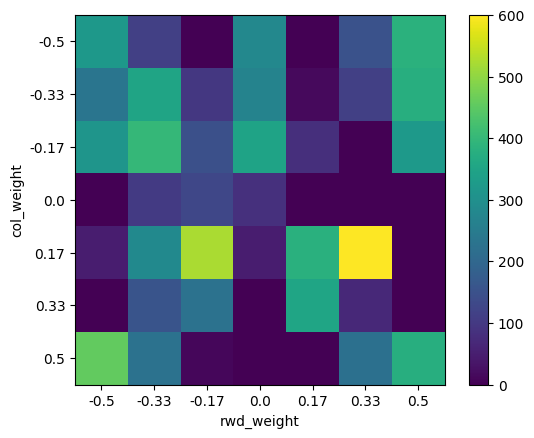

In [35]:
#res1 = res.copy()
plt.imshow(res1, cmap="viridis")
plt.xticks(range(tot), values)
plt.yticks(range(tot), values)
plt.xlabel(r"rwd_weight")
plt.ylabel(r"col_weight")
plt.colorbar()
plt.show()

## Plotting

In [64]:
respath = "../src/analysis/results"
files = os.listdir(respath)
print(files)

['remap_142_229', 'remap_142_2021.json', 'remap_142_1951.json', 'remap_142_217.json']


In [65]:
with open(f"{respath}/{files[0]}/data.json", "r") as f:
    data = json.load(f)

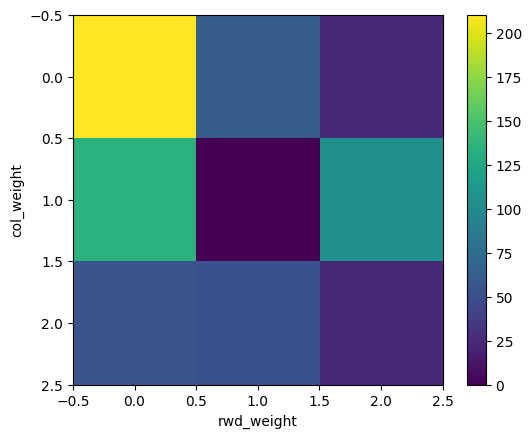

In [66]:
#res1 = res.copy()
plt.imshow(data, cmap="viridis")
#plt.xticks(range(tot), values)
#plt.yticks(range(tot), values)
plt.xlabel(r"rwd_weight")
plt.ylabel(r"col_weight")
plt.colorbar()
plt.show()